# LSN Exercise 11

The aim of this Python-numerical exercise is to explore the application of **Supervised Machine Learning** to the **fitting** of simple functions.

In [1]:
# Settings and libraries:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
SCALE = 5
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

# Machine Learning libraries:

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

## 11.1 Linear fit

To study how a simple **Neural Network (NN)** performs for different *sizes of the data set*, *number of training epochs* and "*fit complexity*" (i.e. how strong is the noise in the input data set), we consider the simple linear function:

$$ f(x) = 2x + 1 \qquad x \in [-1,1]$$

and we build a **single neuron NN** as follows:

In [2]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We define the fitting function and the following parameters, which we are going to change to study the results on the fitting quality:

In [3]:
# Linear regression parameters:

m = 2          # slope
q = 1          # intercept
x_low = -1     # lower bound 
x_up = 1       # upper bound

# Training & validation data set size - noise strength - number of training epochs:

N_train = 1000  # training points
N_val = 100     # validation points
sigma = 2.5     # noise strength
n_epochs = 10   # number of epochs

We generate the *traning* and *validation data sets* and we represent the fitting problem:

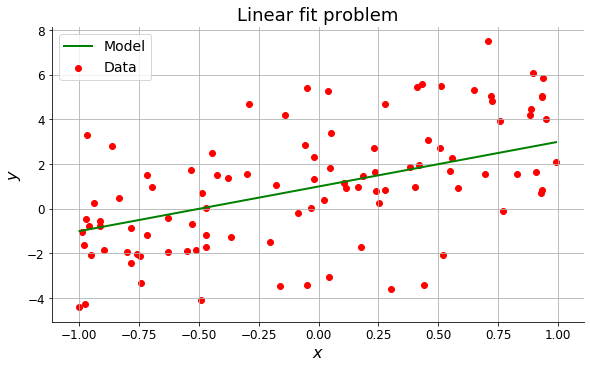

In [4]:
# Generate training inputs:
np.random.seed(0)
x_train = np.random.uniform(x_low, x_up, N_train)
x_valid = np.random.uniform(x_low, x_up, N_val)
x_valid.sort()

# Target linear function:
y_target = m * x_valid + q

# Adding noise:
y_train = np.random.normal(m * x_train + q, sigma)
y_valid = np.random.normal(m * x_valid + q, sigma)

# Plotting:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_valid, y_valid, color='red', label='Data')
plt.title("Linear fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

Now it's time to train our NN with the training data set, extracting the *best weights* for our model:

In [5]:
batch = 32   # Fixed batch size
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

w_1, w_2 = model.get_weights()
print("-------------------------")
print("weight 1: ", w_1)
print("weight 2: ", w_2)

Epoch 1/10
32/32 [==============================] - 1s 17ms/step - loss: 7.6731 - mse: 7.6731 - val_loss: 7.0887 - val_mse: 7.0887
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 6.8234 - mse: 6.8234 - val_loss: 6.4137 - val_mse: 6.4137
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 6.4544 - mse: 6.4544 - val_loss: 6.0195 - val_mse: 6.0195
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 6.2529 - mse: 6.2529 - val_loss: 5.7900 - val_mse: 5.7900
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 6.1430 - mse: 6.1430 - val_loss: 5.6063 - val_mse: 5.6063
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 6.0656 - mse: 6.0656 - val_loss: 5.4898 - val_mse: 5.4898
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 6.0165 - mse: 6.0165 - val_loss: 5.4000 - val_mse: 5.4000
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 5.9877 - mse: 5.9

To estimate the goodness of the model we use the validation data set and then we evaluate the model for the exact curve:

In [6]:
# evaluate the goodness of the model:
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# evaluate model with the exact curve:
score = model.evaluate(x_valid, y_target, batch_size=batch, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 5ms/step - loss: 5.2437 - mse: 5.2437

Test loss: 5.243670463562012
Test accuracy: 5.243670463562012

4/4 [==============================] - 0s 2ms/step - loss: 0.0168 - mse: 0.0168

Test loss: 0.01678529568016529
Test accuracy: 0.01678529568016529


If the value of $\sigma$ is big, testing the model with the validation data set and with the target function produces very different loss and accuracy values: the model is accurate respect the exact curve, but is less capable of making new predictions. 

In addition we can reconstruct the *training history*, plotting the *loss values* for both training and validation sessions:

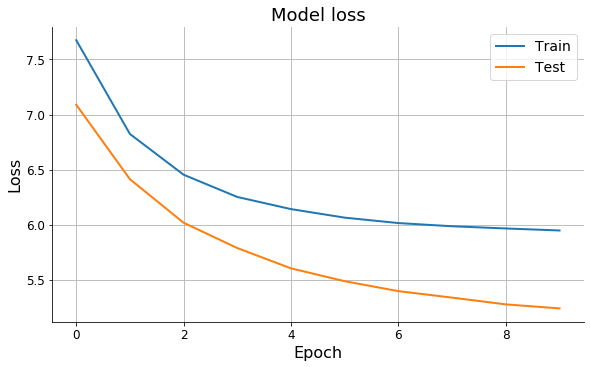

In [7]:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

The *test loss* and *training loss* follow the same trend, but increasing the value of $\sigma$ the gap between them also increases: the training session suffers of the big values of $\sigma$, because the model is more difficult to reconstruct; instead, in the test phase, the network performs slightly better beacuse recognizes the same pattern.

Finally, to visualize our results we plot the prediction of the model together with the target fit function:

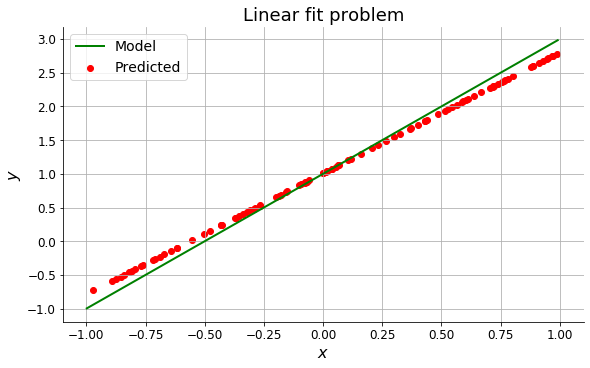

In [8]:
# Model prediction: 
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_predicted, y_predicted, color='red', label='Predicted')
plt.title("Linear fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

**Summary of the attempts:**
- 1. `N_train`$=100$, `N_val`$=10$, `N_epochs`$=10$ and `sigma`$=0.3$ : even with a law value of $\sigma$ the NN fails to properly fit the function;
- 2. We try to increase the number of epochs to `N_epochs`$=100$ : the curve now fits nicely, so we try to progressively increase the the noise to `sigma`$=0.6$, `sigma`$=0.9$ and `sigma`$=1.5$, getting a decent fit but each time worser;
- 3. Instead of increasing the number of epochs we use a larger input data set: `N_train`$=1000$, `N_val`$=100$, `N_epochs`$=10$. We notice that, even with a huge deviation `sigma`$=2.5$, we get a nice fit;

**Conclusions:** The number of training epochs is an important parameter, because, in absence of a huge data set, increasing its value helps the NN to understand the underlying model. However, *the key to perform an optimal regression is to have a great number of training and validation points, in the ratio $9/10$*. In this case, even with a small number of epochs and a strong noise, the NN is able to correctly predict the mdoel.

## 11.2 Polinomial fit

The next curve we try to fit is a polynomial of order 3:

$$ f(x) = 3x^3 - 2x^2 - 3x + 4 \qquad x \in [-1,1]$$

The increased complexity of the model suggests to build a more complex NN and to use a huge training data set. Let's start setting up the problem and some parameters:

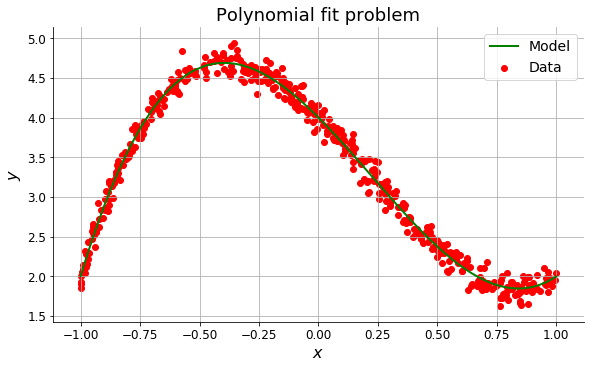

In [9]:
# Polynomial regression parameters: f(x) = ax^3 + bx^2 + cx + d

a = 3
b = -2
c = -3
d = 4
x_low = -1     # lower bound 
x_up = 1       # upper bound

# Training & validation data set size - noise strength - number of training epochs:

N_train = 5000  # training points
N_val = 500     # validation points
sigma = 0.1     # noise strength
n_epochs = 10   # number of epochs

# Generate training inputs:
x_train = np.random.uniform(x_low, x_up, N_train)
x_valid = np.random.uniform(x_low, x_up, N_val)
x_valid.sort()

# Target polynomial function:
y_target =  a*x_valid**3 + b*x_valid**2 + c*x_valid + d

# Adding noise:
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma)
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)

# Plotting:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_valid, y_valid, color='red', label='Data')
plt.title("Polynomial fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

The starting point of our NN is an input layer of 1 neuron, followed by an hidden layer of 10 neurons and an outoput layer of a single neuron again. The want to use *activation functions with plateau*, varying smoothly and maintaining negative outputs; here we use the `sigmoid` activation:

In [10]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


Let's train our new NN and study its performances:

-------------------------------------------TRAINING ENDED--------------------------------------------

Goodness evaluation with the validation set:
Test loss: 0.3698519766330719
Test accuracy: 0.3698519766330719

Goodness evaluation with the exact curve:
Test loss: 0.35651224851608276
Test accuracy: 0.35651224851608276

-----------------------------------------------------------------------------------------------------


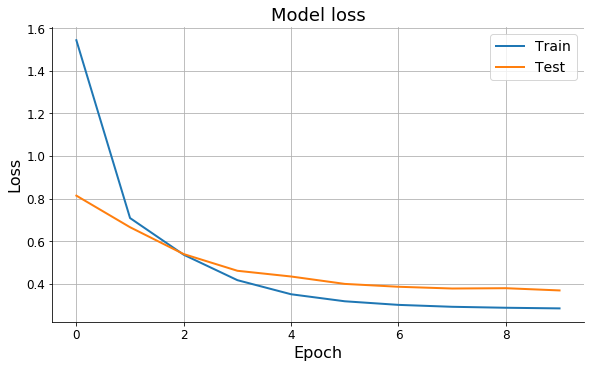

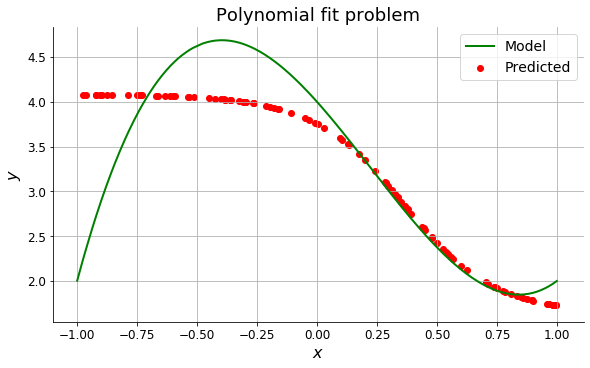

In [11]:
batch = 32   # Fixed batch size
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

w = model.get_weights()
print("-------------------------------------------TRAINING ENDED--------------------------------------------")
print()

# evaluate the goodness of the model:
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the validation set:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# evaluate model with the exact curve:
score = model.evaluate(x_valid, y_target, batch_size=batch, verbose=0)
print("Goodness evaluation with the exact curve:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print("-----------------------------------------------------------------------------------------------------")

# Training and validation loss:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Model prediction: 
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_predicted, y_predicted, color='red', label='Predicted')
plt.title("Polynomial fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

The fit fails for negative values of $x$. We can try to use a more "robust" and "adaptive" optimizer together with more training sessions, but the feeling is that the activation functions must be changed or some layers must be added:

-------------------------------------------TRAINING ENDED--------------------------------------------

Goodness evaluation with the validation set:
Test loss: 6.83070707321167
Test accuracy: 6.83070707321167

Goodness evaluation with the exact curve:
Test loss: 6.837245941162109
Test accuracy: 6.837245941162109

-----------------------------------------------------------------------------------------------------


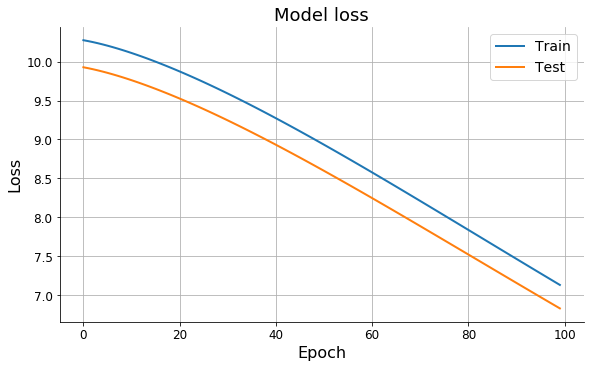

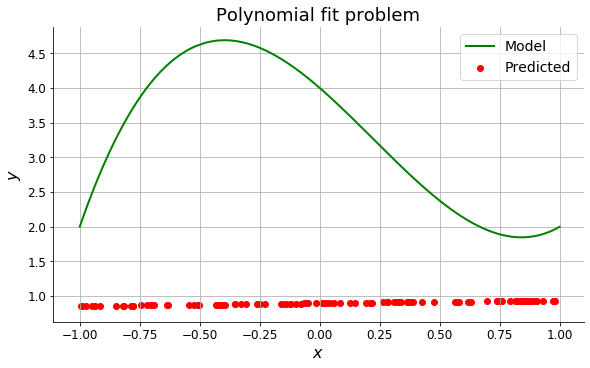

In [12]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

# Using "Adadelta" optimizer
model.compile(optimizer='adadelta', loss='mse', metrics=['mse']) 

n_epochs = 100   # Increasing the number of epochs from 10 to 100
batch = 32       # Fixed batch size
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

w = model.get_weights()
print("-------------------------------------------TRAINING ENDED--------------------------------------------")
print()

# evaluate the goodness of the model:
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the validation set:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# evaluate model with the exact curve:
score = model.evaluate(x_valid, y_target, batch_size=batch, verbose=0)
print("Goodness evaluation with the exact curve:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print("-----------------------------------------------------------------------------------------------------")

# Training and validation loss:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Model prediction: 
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_predicted, y_predicted, color='red', label='Predicted')
plt.title("Polynomial fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

The fit results in a total failure! Coming back to the SGD optimizer, sticking to the MSE loss and keeping $100$ epochs, we try to increase the number of neurons in the hidden layer:

In [13]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='tanh'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


-------------------------------------------TRAINING ENDED--------------------------------------------

Goodness evaluation with the validation set:
Test loss: 0.34530556201934814
Test accuracy: 0.34530556201934814

Goodness evaluation with the exact curve:
Test loss: 0.33244091272354126
Test accuracy: 0.33244091272354126

-----------------------------------------------------------------------------------------------------


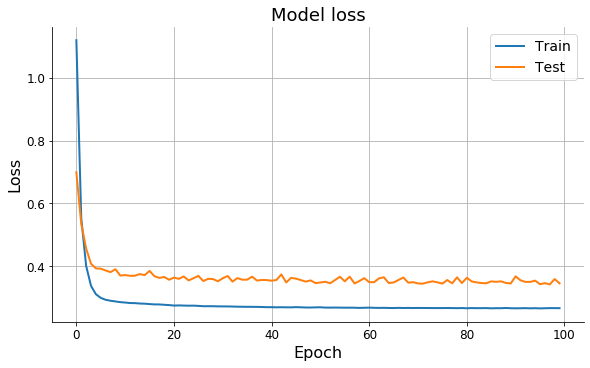

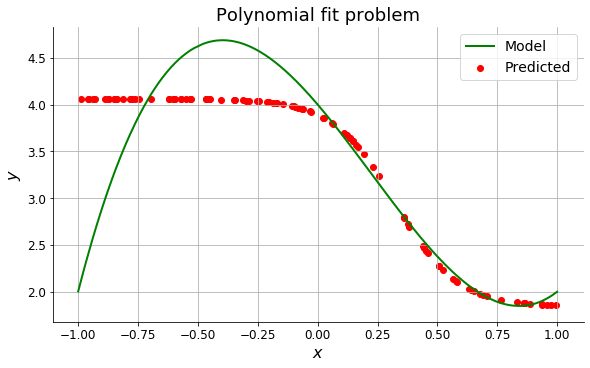

In [14]:
batch = 32   # Fixed batch size
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

w = model.get_weights()
print("-------------------------------------------TRAINING ENDED--------------------------------------------")
print()

# evaluate the goodness of the model:
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the validation set:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# evaluate model with the exact curve:
score = model.evaluate(x_valid, y_target, batch_size=batch, verbose=0)
print("Goodness evaluation with the exact curve:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print("-----------------------------------------------------------------------------------------------------")

# Training and validation loss:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Model prediction: 
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_predicted, y_predicted, color='red', label='Predicted')
plt.title("Polynomial fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

*Increasing the number of neurons in a single layer does not result in a better learning process!* We try to add an open bound activation function as input with 10 neurons, and costruct a 2 hidden layer NN with 10 neurons each, with plateau activations `tanh` and `sigmoid` as before, because they gave a decent fit in the region $x>0$:

In [15]:
model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


-------------------------------------------TRAINING ENDED--------------------------------------------

Goodness evaluation with the validation set:
Test loss: 0.012227802537381649
Test accuracy: 0.012227802537381649

Goodness evaluation with the exact curve:
Test loss: 0.0016968183917924762
Test accuracy: 0.0016968183917924762

-----------------------------------------------------------------------------------------------------


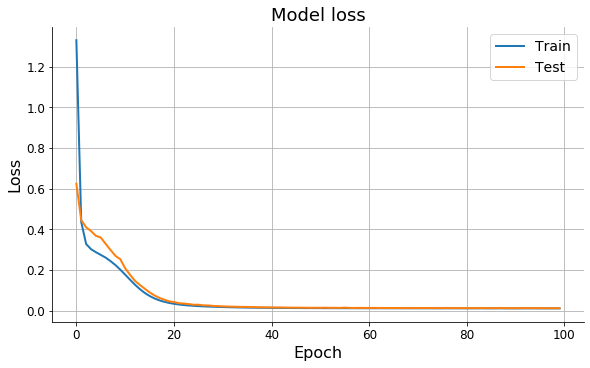

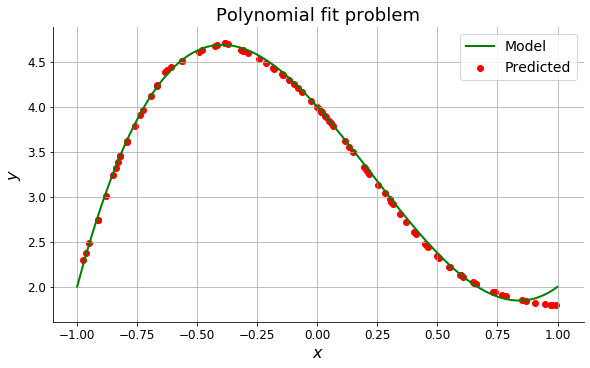

In [16]:
batch = 32   # Fixed batch size
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

w = model.get_weights()
print("-------------------------------------------TRAINING ENDED--------------------------------------------")
print()

# evaluate the goodness of the model:
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the validation set:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# evaluate model with the exact curve:
score = model.evaluate(x_valid, y_target, batch_size=batch, verbose=0)
print("Goodness evaluation with the exact curve:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print("-----------------------------------------------------------------------------------------------------")

# Training and validation loss:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Model prediction: 
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_predicted, y_predicted, color='red', label='Predicted')
plt.title("Polynomial fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

Finally we obtained a nice fit! What conclusions can we drow? Having fixed the noise $\sigma$ of the input data set, having chosen a large number of training/validation points and training epochs, *the goodness of the fit and the prediction ability of our NN is mostly dependent on the number of layers, the activation functions chosen and the order of the layers.* Just using a small number of neurons but with the correct combination of layers makes the job!

We know show that, though the fit is good on training data, the prediction ability of our NN is not enough: *to have better prediction ability we need a more complex NN, with more trainable parameters*!

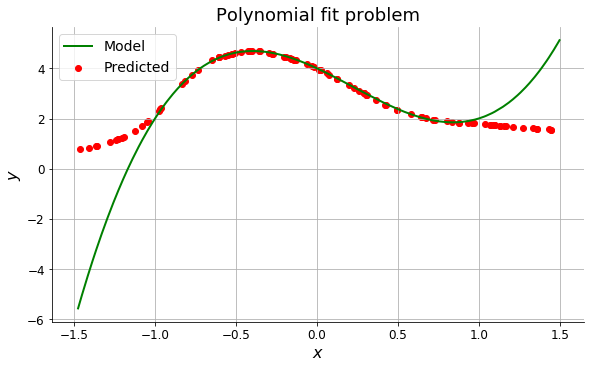

In [17]:
# Model prediction outside the training region:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)

# Target function in the new range:
x_valid = np.random.uniform(-1.5, 1.5, N_val)
x_valid.sort()
y_target =  a*x_valid**3 + b*x_valid**2 + c*x_valid + d

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x_valid, y_target, color='green', label='Model')
plt.scatter(x_predicted, y_predicted, color='red', label='Predicted')
plt.title("Polynomial fit problem")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

## 11.3 Trigonometric fit

We try to extend the previously built NN to fit a 2D function:

$$ f(x,y) = \sin(x^2 + y^2) \qquad x \in [-3/2,3/2] \qquad y \in [-3/2,3/2] $$

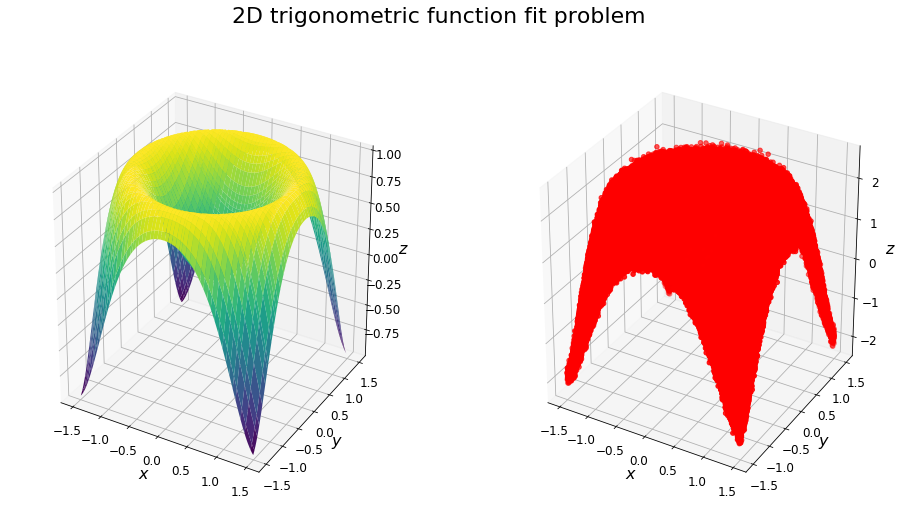

In [19]:
# Regression parameters:

x_low = -1.5
x_up = 1.5
y_low = -1.5
y_up = 1.5

# Training & validation data set size - noise strength - number of training epochs:

N_train = 5000  # training points
N_val = 500     # validation points
sigma = 0.1     # noise strength
n_epochs = 100  # number of epochs

# Generate 2D training and validation inputs:
x_train = np.random.uniform(x_low, x_up, (N_train,2))
x_valid = np.random.uniform(x_low, x_up, (N_val,2))
x_valid[:,0].sort()
x_valid[:,1].sort()

# Adding noise:
z_train = np.random.normal(np.sin(x_train[:,0]*x_train[:,0] + x_train[:,1]*x_train[:,1]), sigma)
z_valid = np.random.normal(np.sin(x_valid[:,0]*x_valid[:,0] + x_valid[:,1]*x_valid[:,1]), sigma)

# 3D PLOT VISUALIZATION ------------------------------------------

# Target function:
def F(x,y):
    return np.sin((x**2 + y**2))

# Noisy function:
def N(x,y):
    return F(x,y) + np.random.normal(F(x,y), sigma)

# Meshes:
X_valid, Y_valid = np.meshgrid(x_valid[:,0], x_valid[:,1])
Z_target = F(X_valid, Y_valid)
Z_valid = N(X_valid, Y_valid)    # Only for visualization: does NOT contain the same points of "z_valid" !!!

fig = plt.figure(figsize=(16,8))
fig.suptitle("2D trigonometric function fit problem", fontsize=22)

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(X_valid, Y_valid, Z_target, cmap='viridis')
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_zlabel("$z$")
ax1.grid()

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.scatter(X_valid, Y_valid, Z_valid, c='red', depthshade=True)
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.set_zlabel("$z$")
ax2.grid()

Now we set up the same NN that was able to perform the polynomial fit, but with a *fundamental change*: *the input_shape parameter must be set to 2*:

In [20]:
model = Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


-------------------------------------------TRAINING ENDED--------------------------------------------

Goodness evaluation with the validation set:
Test loss: 0.31472593545913696
Test accuracy: 0.31472593545913696

Goodness evaluation with the exact curve:
Test loss: 0.31472593545913696
Test accuracy: 0.31472593545913696

-----------------------------------------------------------------------------------------------------


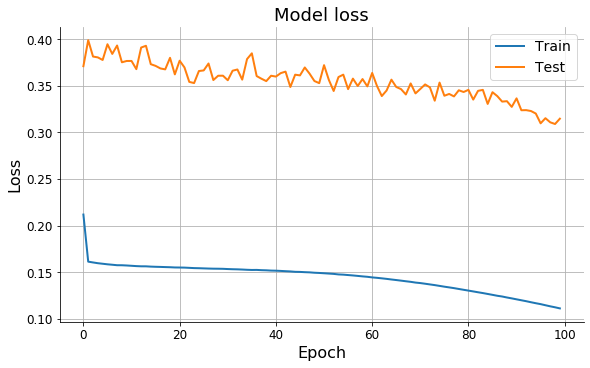

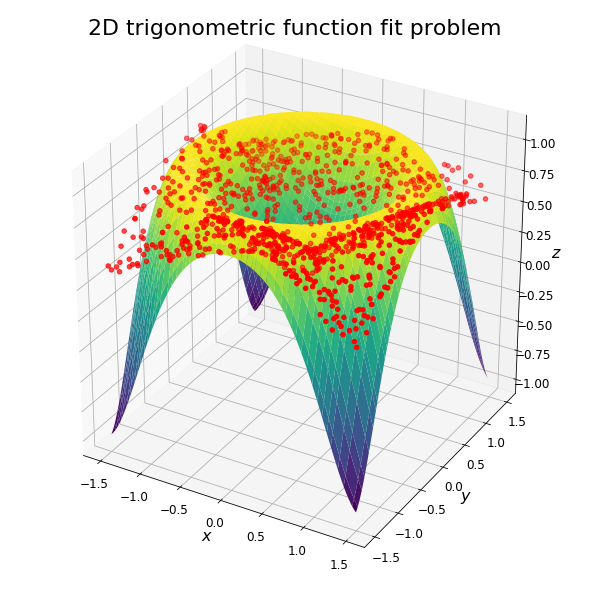

In [21]:
batch = 32   # Fixed batch size
history = model.fit(x_train, z_train, 
          batch_size=batch, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, z_valid), verbose=0)

w = model.get_weights()
print("-------------------------------------------TRAINING ENDED--------------------------------------------")
print()

# evaluate the goodness of the model:
score = model.evaluate(x_valid, z_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the validation set:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# evaluate model with the exact curve:
score = model.evaluate(x_valid, z_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the exact curve:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print("-----------------------------------------------------------------------------------------------------")

# Training and validation loss:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Model prediction: 
x_predicted = np.random.uniform(x_low, x_up,(1000,2))
z_predicted = model.predict(x_predicted)

fig = plt.figure(figsize=(8,8))
plt.suptitle("2D trigonometric function fit problem", fontsize=22)
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], z_predicted, color='r')
ax.plot_surface(X_valid, Y_valid, Z_target, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

Our previous NN performs a decent fit in the central region. We have only changed the input shape, to adapt the fit for a 2D model. To get better results, we try to increase significantly the number of training epochs, passing from $100$ to $500$:

-------------------------------------------TRAINING ENDED--------------------------------------------

Goodness evaluation with the validation set:
Test loss: 0.014571570791304111
Test accuracy: 0.014571570791304111

Goodness evaluation with the exact curve:
Test loss: 0.014571570791304111
Test accuracy: 0.014571570791304111

-----------------------------------------------------------------------------------------------------


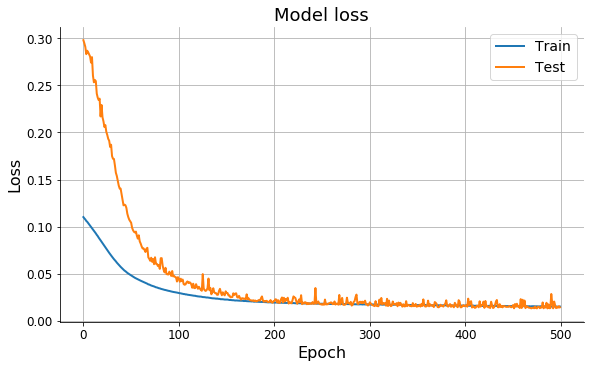

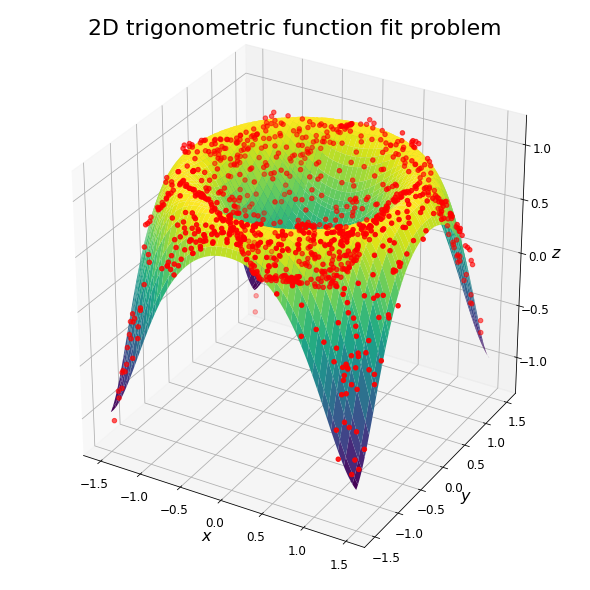

In [22]:
n_epochs = 500
batch = 32   # Fixed batch size
history = model.fit(x_train, z_train, 
          batch_size=batch, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, z_valid), verbose=0)

w = model.get_weights()
print("-------------------------------------------TRAINING ENDED--------------------------------------------")
print()

# evaluate the goodness of the model:
score = model.evaluate(x_valid, z_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the validation set:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# evaluate model with the exact curve:
score = model.evaluate(x_valid, z_valid, batch_size=batch, verbose=0)
print("Goodness evaluation with the exact curve:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print("-----------------------------------------------------------------------------------------------------")

# Training and validation loss:
plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Model prediction: 
x_predicted = np.random.uniform(x_low, x_up,(1000,2))
z_predicted = model.predict(x_predicted)

fig = plt.figure(figsize=(8,8))
plt.suptitle("2D trigonometric function fit problem", fontsize=22)
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], z_predicted, color='r')
ax.plot_surface(X_valid, Y_valid, Z_target, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()